<a href="https://colab.research.google.com/github/nandithags11/ML_beginner/blob/main/DDosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from matplotlib.colors import ListedColormap
pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.options.mode.use_inf_as_na = True
# simply tells pandas to recognise inf as a NaN in calculations
plt.style.use('dark_background')

In [174]:
df=pd.read_csv("/content/LDAP.csv",sep=',',dtype={'SimillarHTTP': 'object'})
df.columns = df.columns.str.replace(' ', '')
#df.head()

In [175]:
df.shape

(318028, 88)

In [176]:
df.columns

Index(['Unnamed:0', 'FlowID', 'SourceIP', 'SourcePort', 'DestinationIP',
       'DestinationPort', 'Protocol', 'Timestamp', 'FlowDuration',
       'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount

In [177]:
df['Label'].value_counts()/len(df) *100

NetBIOS    63.805388
LDAP       35.288717
BENIGN      0.905581
Name: Label, dtype: float64

In [178]:
df1=df.loc[df['Label'] !='NetBIOS']
df1['Label'].value_counts()/len(df1) *100

LDAP      97.497155
BENIGN     2.501976
Name: Label, dtype: float64

In [179]:
df1.isna().sum()

Unnamed:0                    0
FlowID                       0
SourceIP                     0
SourcePort                   0
DestinationIP                0
DestinationPort              0
Protocol                     0
Timestamp                    0
FlowDuration                 0
TotalFwdPackets              0
TotalBackwardPackets         0
TotalLengthofFwdPackets      0
TotalLengthofBwdPackets      0
FwdPacketLengthMax           0
FwdPacketLengthMin           0
FwdPacketLengthMean          0
FwdPacketLengthStd           0
BwdPacketLengthMax           0
BwdPacketLengthMin           0
BwdPacketLengthMean          0
BwdPacketLengthStd           0
FlowBytes/s                817
FlowPackets/s              817
FlowIATMean                  0
FlowIATStd                   0
FlowIATMax                   0
FlowIATMin                   1
FwdIATTotal                  1
FwdIATMean                   1
FwdIATStd                    1
FwdIATMax                    1
FwdIATMin                    1
BwdIATTo

In [180]:
df1.drop(columns=['FlowBytes/s','FlowPackets/s','Unnamed:0','FlowID', 'SourceIP', 'DestinationIP', 'Timestamp', 'SimillarHTTP', 'SourcePort', 'DestinationPort'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
df1.shape

(115109, 78)

In [182]:
df1.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [183]:
df1.shape

(115108, 78)

In [184]:
df1.columns

Index(['Protocol', 'FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean',
       'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags',
       'FwdURGFlags', 'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSeg

In [185]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values


In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[17.,  1.,  2., ...,  0.,  0.,  1.],
       [17.,  1.,  2., ...,  0.,  0.,  1.],
       [17.,  2.,  2., ...,  0.,  0.,  1.],
       ...,
       [17.,  2.,  2., ...,  0.,  0.,  1.],
       [17.,  1.,  2., ...,  0.,  0.,  1.],
       [17.,  2.,  2., ...,  0.,  0.,  1.]])

In [187]:
std = StandardScaler()
std.fit(x_train)
x_train=std.transform(x_train)
x_test=std.transform(x_test)
#x_train

In [188]:
#x_test

In [189]:
## model

In [190]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict=gnb.predict(x_test)
y_predict

array(['LDAP', 'LDAP', 'LDAP', ..., 'LDAP', 'LDAP', 'LDAP'], dtype='<U6')

In [191]:
y_test

array(['LDAP', 'LDAP', 'LDAP', ..., 'LDAP', 'LDAP', 'LDAP'], dtype=object)

In [192]:
result=confusion_matrix(y_test,y_predict)
result

array([[  868,     0],
       [   17, 33648]])

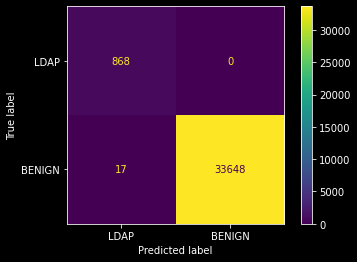

In [193]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
labels=['LDAP','BENIGN']
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()

In [194]:
score=accuracy_score(y_test,y_predict)
score

0.9995077172559581